# イントロダクション

In [3]:
name1='黒子野'
name2='太助'
age=26
print('私は'+name1+name2+'です。'+str(age)+'才です。')
print('私は{}{}です。{}才です。'.format(name1,name2,age))

私は黒子野太助です。26才です。
私は黒子野太助です。26才です。


## タプル　書き換えのできないリスト

In [4]:
a=(4,5,6,7)

In [5]:
type(a)

tuple

In [7]:
a[0]
# []:要素へのアクセス
#():関数へのアクセス

4

In [8]:
names=['吉崎','佐藤','鈴木','高橋']

In [9]:
for name in names:
    print('{}さん、こんにちは  '.format(name))

吉崎さん、こんにちは  
佐藤さん、こんにちは  
鈴木さん、こんにちは  
高橋さん、こんにちは  


### プログラムを書くときのコツ
- まずは動くものを書く(汚くてもOK)
- **汎用性**の高いものに修正
- **可読性**の高いものに修正

まず動く→**リファクタリング**

**アルゴリズム**を学ぶときのコツ

- 文章で手順を書く
- コードを書く

In [12]:
a=4
if a%2==0:
    print('偶数です')

偶数です


In [13]:
# 関数の定義
def hello(nya):
    print(nya)
hello('wow')

wow


In [14]:
def say_hello(lastname,firstname):
    print('こんにちは、{}{}さん。'.format(lastname,firstname))
    print('ご機嫌、いかがですか。')
say_hello('黒子野','太助')

こんにちは、黒子野太助さん。
ご機嫌、いかがですか。


##  演習問題(60分)
**問題**

10000までの素数を表示するプログラムを書いてください。

素数：1,2,3,5,7,...

**発展**

スピードアップを図ってください。

In [15]:
%%time #時間を測れる
a=1

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11 µs


In [17]:
%%timeit #時間を測れる、何回か繰り返した平均を表示してくれる
a=1

22.7 ns ± 2.5 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


もし1つでも余りが0となっていれば、割り切れているので素数でない
すべて余りが0でなければ素数　　

- 素数判定フラグをTrueに初期化

In [34]:
def gem_prime_numbers(max_val):
    numbers=[]

    for i in range(1,max_val+1):
        flag=True #素数判定フラグ
        for j in range(2,i):
            if i % j==0:
                flag=False
            #素数の場合
        if flag:
            numbers.append(i)
    return numbers

In [41]:
%%timeit
numbers = gem_prime_numbers(10)

7.62 µs ± 255 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [42]:
%%timeit
numbers = gem_prime_numbers(100)

380 µs ± 51.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [43]:
%%timeit
numbers = gem_prime_numbers(1000)

39.5 ms ± 1.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [44]:
%%timeit
numbers = gem_prime_numbers(10000)

4.6 s ± 132 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## プログラムを組むときは、内側から考えてゆくことが多い

***計算量(オーダー)***

$n=10$

- $O(n)$ <- 10倍すると、計算量が10倍になる
- $O(n^2)$ <- 10倍すると、計算量が100倍になる
- $O(n^3)$ <- 10倍すると、計算量が1000倍になる

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

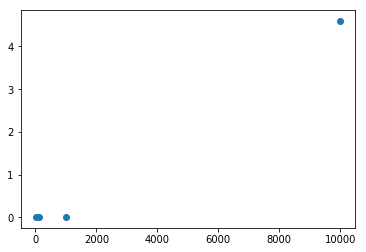

In [46]:
max_vals=[10,100,1000,10000]
#μs=1e-6：10の-6乗,ms=1e-3：10の-3乗
times=[7.62*1e-6,380*1e-6,3.95*1e-3,4.6]

plt.scatter(max_vals,times)

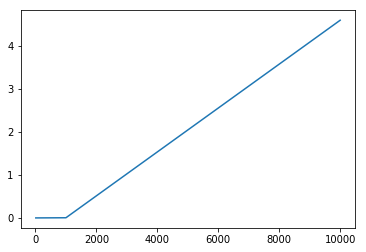

In [47]:
max_vals=[10,100,1000,10000]
times=[7.62*1e-6,380*1e-6,3.95*1e-3,4.6]

plt.plot(max_vals,times)

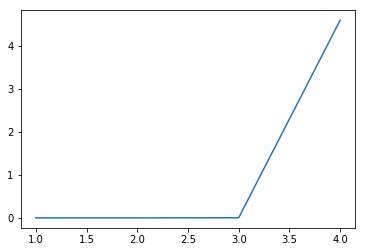

In [48]:
#片対数グラフ
max_vals=[1,2,3,4]
times=[7.62*1e-6,380*1e-6,3.95*1e-3,4.6]

plt.plot(max_vals,times)

In [60]:
#高速化1
#breakを追加した処理
def gem_prime_numbers(max_val):
    numbers=[]

    for i in range(1,max_val+1):
        flag=True 
        for j in range(2,i):
            if i % j==0:
                flag=False
                break;
        if flag:
            numbers.append(i)
    return numbers

In [51]:
%%timeit
numbers = gem_prime_numbers(10)

6.99 µs ± 689 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [55]:
%%timeit
numbers = gem_prime_numbers(100)

111 µs ± 946 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [57]:
%%timeit
numbers = gem_prime_numbers(1000)

6.91 ms ± 564 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [56]:
%%timeit
numbers = gem_prime_numbers(10000)

622 ms ± 21.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


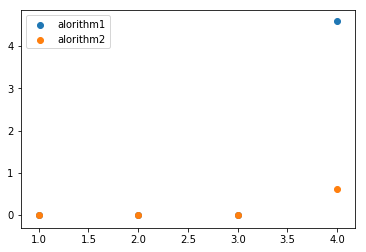

In [59]:
#片対数グラフ
max_vals=[1,2,3,4]
times1=[7.62*1e-6,380*1e-6,3.95*1e-3,4.6]
times2=[6.99*1e-6,111*1e-6,6.91*1e-3,622*1e-3]
plt.scatter(max_vals,times1,label='alorithm1')
plt.scatter(max_vals,times2,label='alorithm2')
plt.legend()

In [70]:
#高速化2
#breakを追加した処理
def gem_prime_numbers(max_val):
    numbers=[]

    for i in range(2,max_val+1):
        flag=True 
        for number in numbers:
            if i % number==0:
                flag=False
                break;
        if flag:
            numbers.append(i)
    numbers.insert(0,1) #先頭に1を追加
    return numbers

In [71]:
numbers=gem_prime_numbers(100)

In [72]:
numbers

[1,
 2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97]

In [73]:
%%timeit
numbers = gem_prime_numbers(10)

3.17 µs ± 524 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [74]:
%%timeit
numbers = gem_prime_numbers(100)

41.1 µs ± 5.49 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [75]:
%%timeit
numbers = gem_prime_numbers(1000)

1.12 ms ± 64.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [76]:
%%timeit
numbers = gem_prime_numbers(10000)

70.3 ms ± 5.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


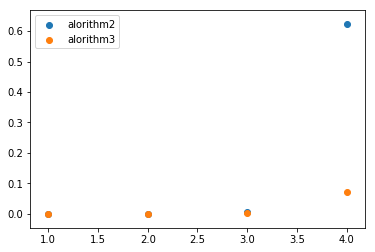

In [78]:
#片対数グラフ
max_vals=[1,2,3,4]
times1=[7.62*1e-6,380*1e-6,3.95*1e-3,4.6]
times2=[6.99*1e-6,111*1e-6,6.91*1e-3,622*1e-3]
times3=[3.17*1e-6,41.1*1e-6,1.12*1e-3,70.3*1e-3]
#plt.scatter(max_vals,times1,label='alorithm1')
plt.scatter(max_vals,times2,label='alorithm2')
plt.scatter(max_vals,times3,label='alorithm3')
plt.legend()